In [ ]:
from google.colab import files

uploaded = files.upload()

import os
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

!mv kaggle.json ~/.kaggle/


Saving kaggle.json to kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 134MB/s]
100% 812M/812M [00:07<00:00, 115MB/s]


In [ ]:
import zipfile

data_set_path = "dogs-vs-cats.zip"
destination = '/kaggle/files/images'

# Verify the existence of the zip file
if os.path.exists(data_set_path):
    with zipfile.ZipFile(data_set_path, "r") as z:
        z.extractall(destination)
    print("Files extracted successfully.")
else:
    print(f"File not found: {data_set_path}")

Files extracted successfully.


In [ ]:
extracted_files = os.listdir(destination)
print(f"Extracted files: {extracted_files}")

Extracted files: ['sampleSubmission.csv', 'train.zip', 'test1.zip']


In [ ]:
import numpy as np
import pandas as pd
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

import warnings
warnings.filterwarnings("ignore")

file_list = os.listdir(destination)
data_ = pd.DataFrame({'file': file_list})

data_['class'] = data_['file'].apply(lambda x: 1 if 'dog' in x else 0)

print(data_.head())

file = data_['file']
Y = data_['class']

                   file  class
0  sampleSubmission.csv      0
1             train.zip      0
2             test1.zip      0


In [ ]:
import zipfile
import os

data_set_path = "dogs-vs-cats.zip"
destination = '/kaggle/files/images'
train_zip_path = os.path.join(destination, 'train.zip')
test_zip_path = os.path.join(destination, 'test1.zip')

if os.path.exists(data_set_path):

    with zipfile.ZipFile(train_zip_path, "r") as z_train:
        z_train.extractall(destination)
    print("Train files extracted successfully.")

    with zipfile.ZipFile(test_zip_path, "r") as z_test:
        z_test.extractall(destination)
    print("Test files extracted successfully.")

    extracted_files = os.listdir(destination)
    print(f"Extracted files: {extracted_files}")


Train files extracted successfully.
Test files extracted successfully.
Extracted files: ['train', 'sampleSubmission.csv', 'test1', 'train.zip', 'test1.zip']


In [ ]:
import os
import pandas as pd


train_directory = '/kaggle/files/images/train'
test_directory = '/kaggle/files/images/test1'

train_files = pd.DataFrame({'file': os.listdir(train_directory)})
test_files = pd.DataFrame({'file': os.listdir(test_directory)})


print("Training files:")
print(train_files.head())

print("\nTest files:")
print(test_files.head())

Training files:
            file
0   dog.7935.jpg
1  cat.12279.jpg
2   cat.2997.jpg
3   dog.1600.jpg
4   cat.6317.jpg

Test files:
        file
0  11710.jpg
1  11036.jpg
2  11080.jpg
3   4970.jpg
4   1642.jpg


In [ ]:
import os
import pandas as pd

train_directory = '/kaggle/files/images/train'
test_directory = '/kaggle/files/images/test1'


train_files = pd.DataFrame({'file': os.listdir(train_directory)})
test_files = pd.DataFrame({'file': os.listdir(test_directory)})


Y_train = []
for filename in train_files['file']:
    if 'dog' in filename:
        Y_train.append(1)
    else:
        Y_train.append(0)

Y_test = []
for filename in test_files['file']:
    if 'dog' in filename:
        Y_test.append(1)
    else:
        Y_test.append(0)


train_files['class'] = Y_train
test_files['class'] = Y_test


print("Training Data:")
print(train_files.head())

print("\nTest Data:")
print(test_files.head())


Training Data:
            file  class
0   dog.7935.jpg      1
1  cat.12279.jpg      0
2   cat.2997.jpg      0
3   dog.1600.jpg      1
4   cat.6317.jpg      0

Test Data:
        file  class
0  11710.jpg      0
1  11036.jpg      0
2  11080.jpg      0
3   4970.jpg      0
4   1642.jpg      0


In [ ]:
file = data_['file']

Y = data_['class']

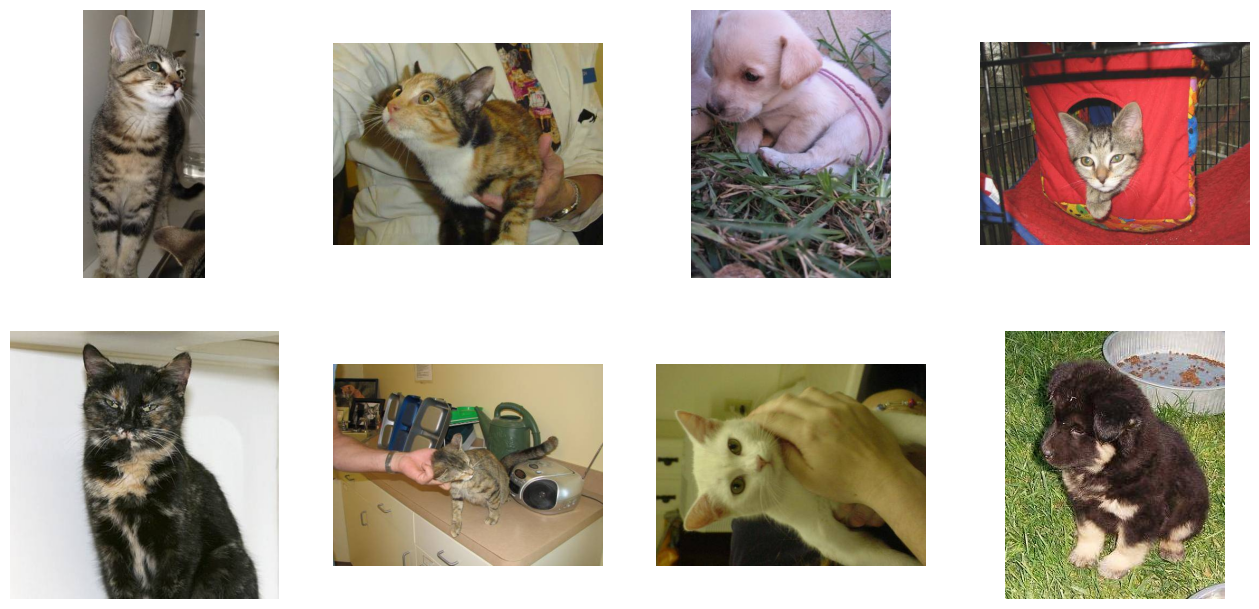

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir('/kaggle/files/images/train')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('/kaggle/files/images/train', img))
    fig.imshow(img)

In [ ]:
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.feature import hog
import os

train_directory = '/kaggle/files/images/train'

data_size = 1200
ptr = 0
X = []

valid_extensions = ['.jpg', '.jpeg', '.png']

for filename in os.listdir(train_directory):

    if any(filename.lower().endswith(ext) for ext in valid_extensions):

        img = mpimg.imread(os.path.join(train_directory, filename))


        resized_img = resize(img, (128, 64))


        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=True)

        X.append(fd)

        ptr += 1


        if ptr >= data_size:
            break


X = np.array(X)

print("Shape of X:", X.shape)


Shape of X: (1200, 3780)


In [ ]:
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.feature import hog
import os
import numpy as np
from sklearn.model_selection import train_test_split


train_directory = '/kaggle/files/images/train'

data_size = 1200
ptr = 0
X = []
Y = []
valid_extensions = ['.jpg', '.jpeg', '.png']

for filename in os.listdir(train_directory):

    if any(filename.lower().endswith(ext) for ext in valid_extensions):

        if 'dog' in filename:
            Y.append(1)
        else:
            Y.append(0)

        img = mpimg.imread(os.path.join(train_directory, filename))


        resized_img = resize(img, (128, 64))


        fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=True)

        X.append(fd)


        ptr += 1

        if ptr >= data_size:
            break

X = np.array(X)
Y = np.array(Y)

X = X[:data_size]
Y = Y[:data_size]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (960, 3780)
Shape of X_test: (240, 3780)
Shape of y_train: (960,)
Shape of y_test: (240,)


In [ ]:
from sklearn.svm import LinearSVC
c=1
svm_LinearSVC = LinearSVC(C=c).fit(X_train, y_train)
accuracy = svm_LinearSVC.score(X_test, y_test)
print('SVC Linear Accuracy: ' + str(accuracy))

SVC Linear Accuracy: 0.6541666666666667


In [ ]:
from sklearn.svm import SVC
svm_svc = SVC(kernel='linear', C=c).fit(X_train, y_train)
accuracy = svm_svc.score(X_test, y_test)
print('Svm-Svc Accuracy: ' + str(accuracy))

Svm-Svc Accuracy: 0.6583333333333333


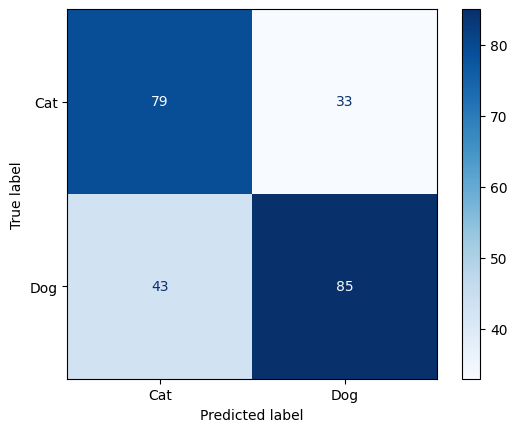

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = SVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

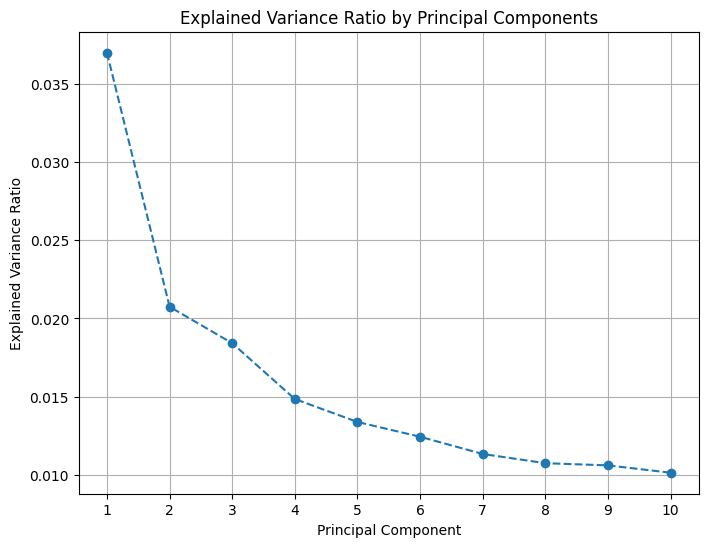

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
pca.fit(X)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()